In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# IFarmProject
Question: Which crop types are the most polluting? How does the crop mix in domestic production affect N surplus?



In [2]:
# iFarmData
scipy.io.loadmat('data/iFarmData')
data = scipy.io.loadmat('data/iFarmData')
#print(data)

In [3]:
#sorted(data.keys())

# Finding the Most Nitrogen Polluting Country

In [74]:
N_content = data['Nyield_kgkm']
yr2015 = int(np.where(data['Yr'][0] == 2015)[0])

for i in range(170):
    if np.isfinite(N_content[0][i][yr1961]):
        print(np.mean(N_content[0][i][yr1961]))

340.09000000000003
1380.9119999999998
1900.8000000000002
1411.76
1208.214
320.0
409.22400000000005
1350.0
1046.016
2128.0
1254.7920000000001
1680.0
633.346
1271.322
856.3679999999999
928.172
426.66880000000003
780.3711999999999
2218.6752
3090.5600000000004
2430.4
1972.5800000000002
1620.7536
914.5296000000001
2493.4208
800.0000000000001
2845.3343999999997
949.8047999999999
872.316
1994.944


# Nitrogen Content in each crop (shown by crop id)

Text(0, 0.5, 'Amount of Nitrogen in crop')

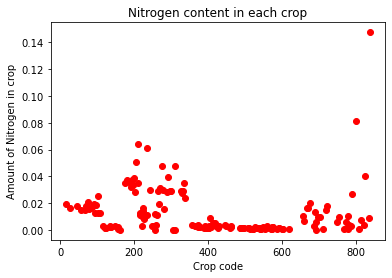

In [5]:
#NC_Bou --> cr
#FAOSTAT_CrCODE_FAO --> cr

NC = data['NC_Bou']
NC = NC.reshape(170,1)
#print((NC.shape))
#print(type(NC))

cr = data['FAOSTAT_CrCODE_FAO']
#print(len(cr))


# The amount on Nitrogen in each crop
plt.scatter(cr,NC, color = 'Red')
plt.title('Nitrogen content in each crop')
plt.xlabel('Crop code')
plt.ylabel('Amount of Nitrogen in crop')

Plot shows the amount of Nitrogen contained in each crop

# Most polluting crops by crop id

In [6]:
# Top 10 most polluting crops

m = NC[NC > 0.038]
print(m)

cr_nc = pd.DataFrame(np.hstack((NC,cr)), columns = ['Nitrogen Content', 'Crop Id'])
#cr_nc

cr_nc[cr_nc['Nitrogen Content'] > 0.038]

[0.081   0.1475  0.048   0.03872 0.064   0.03984 0.0608  0.04    0.048
 0.0504 ]


,Nitrogen Content,Crop Id
0,0.08100,800.0
63,0.14750,839.0
72,0.04800,311.0
79,0.03872,201.0
82,0.06400,210.0
92,0.03984,292.0
142,0.06080,236.0
157,0.04000,826.0
160,0.04800,275.0
163,0.05040,205.0


Top 10 crops(by Crop ID) that pollute the most nitrogen 

# Matching crop id to crop name

In [7]:
# Names of the top 10 most polluting crops
cr_code = data['FAOSTAT_CrCODE_FAO']
cr_name = data['FAOSTAT_CrName_FAO']

nameAndId = pd.DataFrame(np.hstack((cr_name,cr_code)), columns = ['Crop Name', 'Crop Id'])

nameAndId[(nameAndId['Crop Id'] == 800) | (nameAndId['Crop Id'] == 839) | (nameAndId['Crop Id'] == 311) | (nameAndId['Crop Id'] == 201)
         | (nameAndId['Crop Id'] == 210) | (nameAndId['Crop Id'] == 292) | (nameAndId['Crop Id'] == 236) | (nameAndId['Crop Id'] == 826)
         | (nameAndId['Crop Id'] == 275) | (nameAndId['Crop Id'] == 205)]

,Crop Name,Crop Id
0,[Agave Fibres Nes],800
63,[Gums Natural],839
72,[Kapokseed in Shell],311
79,[Lentils],201
82,[Lupins],210
92,[Mustard seed],292
142,[Soybeans],236
157,[Tobacco; unmanufactured],826
160,[Tung Nuts],275
163,[Vetches],205


Listed above is the top 10 most polluting crops 

# Top 10 most polluting crops
Agave Fibres Nes (800) ---> 0.081 \
Gums Natural (839) ---> 0.14750 \
Kapokseed in Shell (311) ---> 0.048 \
Lentils (201) ---> 0.03872 \
Lupins (210) ---> 0.064 \
Mustard seed (292) ---> 0.03984 \
Soybeans (236) ---> 0.0608 \
Tobacco; unmanufactured (826) ---> 0.04 \
Tung Nuts (275) ---> 0.048 \
Vetches (205) ---> 0.0504

# Tracing back crops to the country they are grown

In [8]:
c_code = data['FAOSTAT_CoCODE_FAO']
c_name = data['FAOSTAT_CoName_FAO']

countryAndId = pd.DataFrame(np.hstack((c_name,c_code)), columns = ['Country Name', 'Country Id'])
#countryAndId
c_name[57]

array([array(['Ecuador'], dtype='<U7')], dtype=object)

In [9]:
# use Nyield_kgkm possibly

N_content = data['Nyield_kgkm']

# Gathering each crops index
agave = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Agave Fibres Nes')[0])
gums = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Gums Natural')[0])
kapo = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Kapokseed in Shell')[0])
lentils = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Lentils')[0])
lupins = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Lupins')[0])
mustard = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Mustard seed')[0])
soybean = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Soybeans')[0])
tobacco = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Tobacco; unmanufactured')[0])
tung = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Tung Nuts')[0])
vetches = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Vetches')[0])

# A given year(first year vs. last year)
yr1961 = int(np.where(data['Yr'][0] == 1961)[0])
yr2015 = int(np.where(data['Yr'][0] == 2015)[0])

#Lenght of country name is 218
a = 218
#Length of crop name is 170
b = 170

In [10]:
# Used to find the index of the country that produces the crops we want to look at
# !!! Hopefully we find an easier way to do this !!!

#for i in range(218):
    #if np.isfinite(N_content[i][agave][yr1961]):
        #print(f'Index of country ---> {i}')
        #print(f'Amount of Nitrogen in Crop yield for given crop ---> {N_content[i][vetches][yr2015]}')

# Plotting Nitrogen Content for each crop (1961 vs 2015)

## Fibres Agave Nes

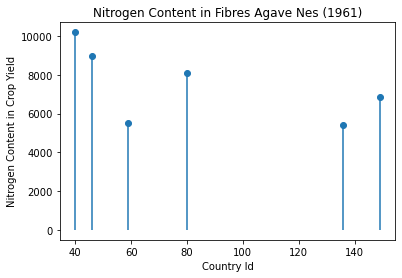

In [29]:
for i in range(218):
    if np.isfinite(N_content[i][agave][yr1961]):
        #print(N_content[i][agave][yr1961])
        x = i
        y = N_content[i][agave][yr1961]
        
        plt.title('Nitrogen Content in Fibres Agave Nes (1961)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.stem(x,y)

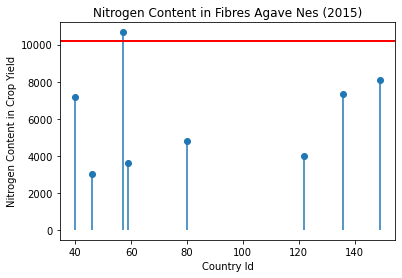

In [30]:
for i in range(218):
    if np.isfinite(N_content[i][agave][yr2015]):
        
        x = i
        y = N_content[i][agave][yr2015]
        
        plt.title('Nitrogen Content in Fibres Agave Nes (2015)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.axhline(y = 10200.33, color = 'red')
        plt.stem(x, y)

## Lentils

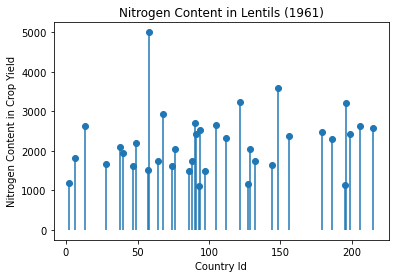

In [13]:
for i in range(218):
    if np.isfinite(N_content[i][lentils][yr1961]):
        #print(N_content[i][lentils][yr1961])
        x = i
        y = N_content[i][lentils][yr1961]
        
        plt.title('Nitrogen Content in Lentils (1961)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.stem(x, y)

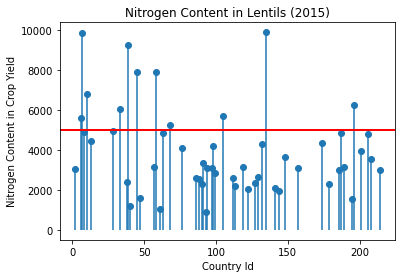

In [14]:
for i in range(218):
    if np.isfinite(N_content[i][lentils][yr2015]):
        
        x = i
        y = N_content[i][lentils][yr2015]
        
        plt.title('Nitrogen Content in Lentils (2015)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.axhline(y = 5005.72, color = 'red')
        plt.stem(x, y)

## Lupins

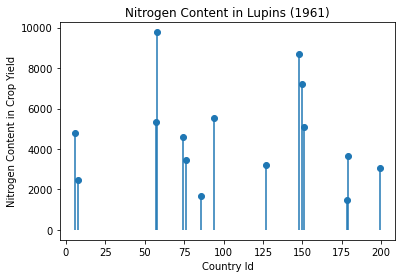

In [15]:
for i in range(218):
    if np.isfinite(N_content[i][lupins][yr1961]):
        #print(N_content[i][lupins][yr1961])
        x = i
        y = N_content[i][lupins][yr1961]
        
        plt.title('Nitrogen Content in Lupins (1961)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.stem(x, y)

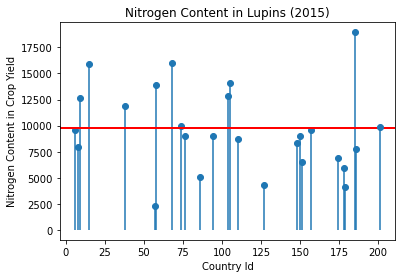

In [16]:
for i in range(218):
    if np.isfinite(N_content[i][lupins][yr2015]):
        
        x = i
        y = N_content[i][lupins][yr2015]
        
        plt.title('Nitrogen Content in Lupins (2015)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.axhline(y = 9769.6, color = 'red')
        plt.stem(x, y)

## Mustard seed

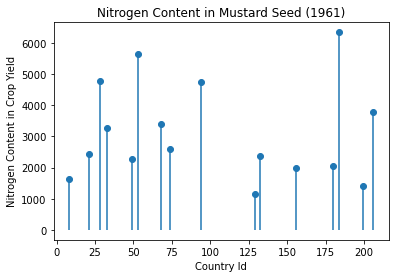

In [17]:
for i in range(218):
    if np.isfinite(N_content[i][mustard][yr1961]):
        #print(N_content[i][mustard][yr1961])
        x = i
        y = N_content[i][mustard][yr1961]
        
        plt.title('Nitrogen Content in Mustard Seed (1961)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.stem(x, y)

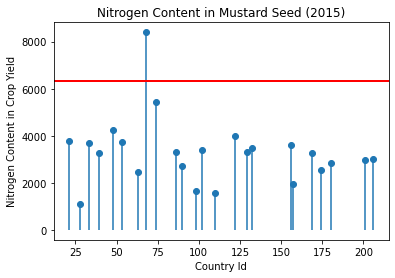

In [18]:
for i in range(218):
    if np.isfinite(N_content[i][mustard][yr2015]):
        
        x = i
        y = N_content[i][mustard][yr2015]
        
        plt.title('Nitrogen Content in Mustard Seed (2015)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.axhline(y = 6336.552, color = 'red')
        plt.stem(x, y)

## Soybeans

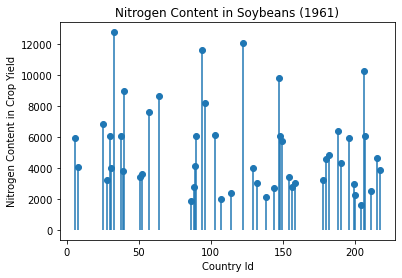

In [19]:
for i in range(218):
    if np.isfinite(N_content[i][soybean][yr1961]):
        #print(N_content[i][soybean][yr1961])
        x = i
        y = N_content[i][soybean][yr1961]
        
        plt.title('Nitrogen Content in Soybeans (1961)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.stem(x, y)

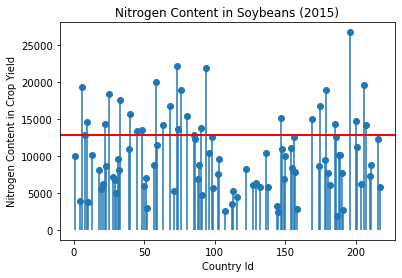

In [20]:
for i in range(218):
    if np.isfinite(N_content[i][soybean][yr2015]):
        
        x = i
        y = N_content[i][soybean][yr2015]
        
        plt.title('Nitrogen Content in Soybeans (2015)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.axhline(y = 12788.064, color = 'red')
        plt.stem(x, y)

## Tobacco

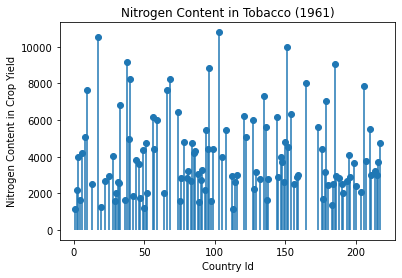

In [21]:
for i in range(218):
    if np.isfinite(N_content[i][tobacco][yr1961]):
        #print(N_content[i][tobacco][yr1961])
        x = i
        y = N_content[i][tobacco][yr1961]
        
        plt.title('Nitrogen Content in Tobacco (1961)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.stem(x, y)

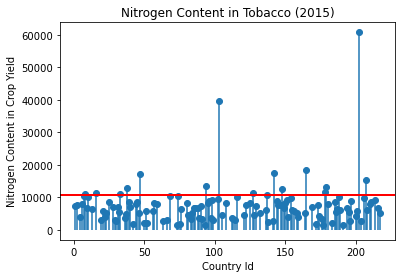

In [22]:
for i in range(218):
    if np.isfinite(N_content[i][tobacco][yr2015]):
        
        x = i
        y = N_content[i][tobacco][yr2015]
        
        plt.title('Nitrogen Content in Tobacco (2015)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.axhline(y = 10800.0, color = 'red')
        plt.stem(x, y)

## Tung Nuts

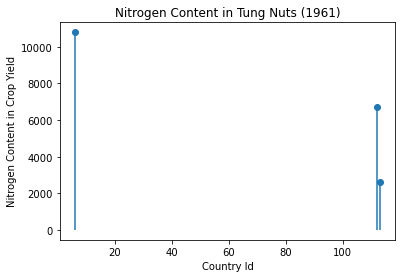

In [23]:
for i in range(218):
    if np.isfinite(N_content[i][tung][yr1961]):
        #print(N_content[i][tung][yr1961])
        x = i
        y = N_content[i][tung][yr1961]
        
        plt.title('Nitrogen Content in Tung Nuts (1961)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.stem(x, y)

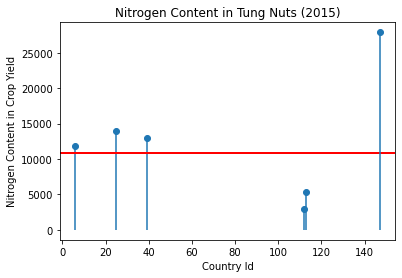

In [24]:
for i in range(218):
    if np.isfinite(N_content[i][tung][yr2015]):
        
        x = i
        y = N_content[i][tung][yr2015]
        
        plt.title('Nitrogen Content in Tung Nuts (2015)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.axhline(y = 10800.0, color = 'red')
        plt.stem(x, y)

## Vetches

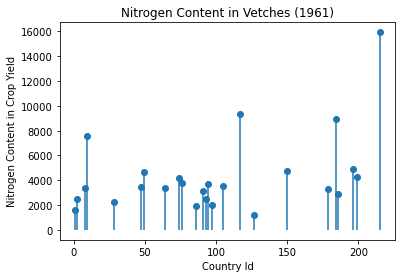

In [32]:
for i in range(218):
    if np.isfinite(N_content[i][vetches][yr1961]):
        #print(N_content[i][vetches][yr1961])
        x = i
        y = N_content[i][vetches][yr1961]
        
        plt.title('Nitrogen Content in Vetches (1961)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.stem(x, y)

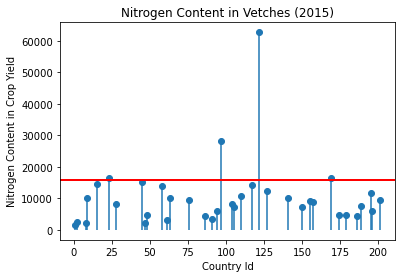

In [33]:
for i in range(218):
    if np.isfinite(N_content[i][vetches][yr2015]):
        
        x = i
        y = N_content[i][vetches][yr2015]
        
        plt.title('Nitrogen Content in Vetches (2015)')
        plt.xlabel('Country Id')
        plt.ylabel('Nitrogen Content in Crop Yield')
        plt.axhline(y = 15934.464, color = 'red')
        plt.stem(x, y)

# Finding Similar Countries between Crops

In [38]:
c_name = data['FAOSTAT_CoName_FAO']

for i in range(218):
    if np.isfinite(N_content[i][vetches][yr2015]):
        print(f'{c_name[i][0][0]} produces this much Nitrogen ---> {N_content[i][vetches][yr2015]}')

Albania produces this much Nitrogen ---> 1615.824
Algeria produces this much Nitrogen ---> 2535.624
Australia produces this much Nitrogen ---> 2148.0480000000002
Austria produces this much Nitrogen ---> 10080.734999999999
Belarus produces this much Nitrogen ---> 14464.8
Bosnia and Herzegovina produces this much Nitrogen ---> 16532.712
Bulgaria produces this much Nitrogen ---> 8147.16
Croatia produces this much Nitrogen ---> 15223.32
Cyprus produces this much Nitrogen ---> 2270.52
Czech Republic produces this much Nitrogen ---> 4720.464
Egypt produces this much Nitrogen ---> 14024.808
Eritrea produces this much Nitrogen ---> 2987.712
Ethiopia produces this much Nitrogen ---> 10045.224
Greece produces this much Nitrogen ---> 9628.416
Hungary produces this much Nitrogen ---> 4502.736
Iraq produces this much Nitrogen ---> 3407.544
Italy produces this much Nitrogen ---> 5871.6
Jordan produces this much Nitrogen ---> 28177.632
Latvia produces this much Nitrogen ---> 8229.480000000001
Lebanon